# Analyzing Events Data

You can load the data from the /Data directory, you have available data form Barcelona (bcn), London (london), Paris (paris), Milan (milan), Rome (rome) and Berlin (berlin) for Instragram (instagram) and Twitter (twitter). It is data for the 10,000 more active users in the period.

For Barcelona, London and Paris ypu have one month of events and two for the rest of the cities. bcn2 and london2 have more than a year of data, so it will take a lot of time to process.

In [1]:
from Code.STData import STData
from Code.Constants import homepath, cityparams
data = STData('../', cityparams['bcn'], 'instagram')

data.read_data()
data.info()

Reading Data ...
A=  instagram
C=  (None, (41.2, 41.65, 1.9, 2.4), 'bcn', None, 120, None)
D=  (211916,)


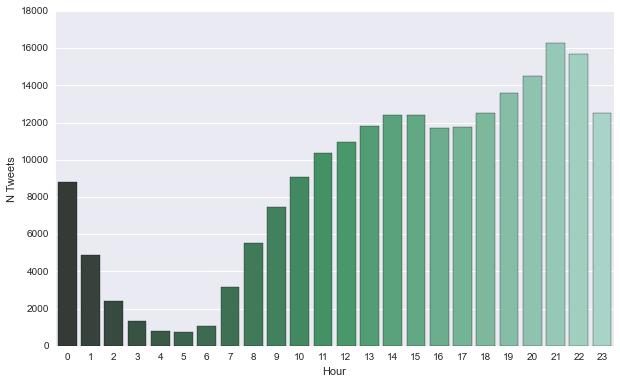

In [2]:
%matplotlib inline
from pylab import *
import pandas as pd
import seaborn as sn
hourly = pd.DataFrame({'Hour': range(24), 'Tweets': data.hourly_table()})

f, ax = plt.subplots(figsize=(10, 6))
sn.barplot(x= 'Hour', y='Tweets', palette="BuGn_d", data=hourly)
ax.set(ylabel="N Tweets", xlabel="Hour")
plt.show()

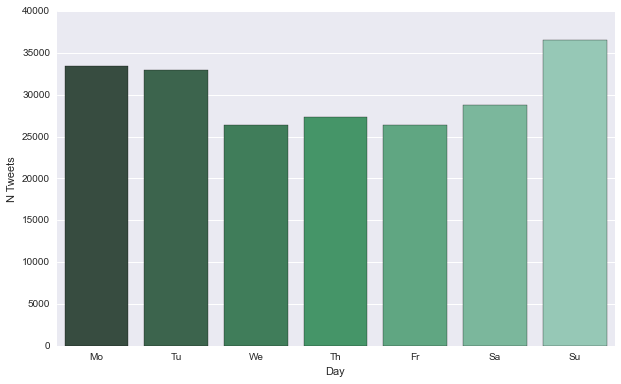

In [3]:
daily = pd.DataFrame({'Day': ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'], 'Tweets': data.daily_table()})

f, ax = plt.subplots(figsize=(10, 6))
sn.barplot(x= 'Day', y='Tweets', palette="BuGn_d", data=daily)
ax.set(ylabel="N Tweets", xlabel="Day")
plt.show()

In [4]:
from Code.Transactions import DailyTransactions

transactions = DailyTransactions(data)

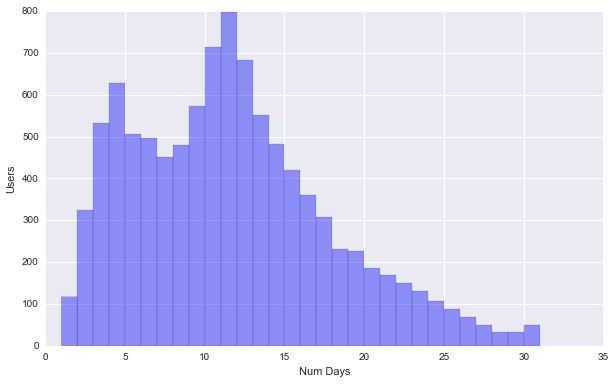

In [5]:
fr = transactions.users_prevalence()
fig, ax = plt.subplots(figsize=(10, 6))
sn.distplot(fr, kde=False, color="b",bins=30)
ax.set(ylabel="Users", xlabel="Num Days")
plt.show()

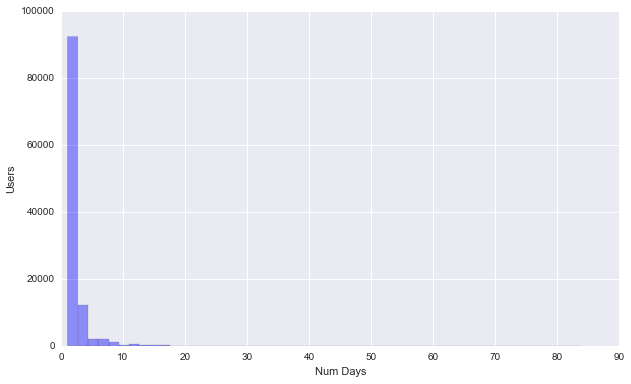

In [6]:

fr = transactions.users_daily_length()
fig, ax = plt.subplots(figsize=(10, 6))
sn.distplot(fr, kde=False, color="b")
ax.set(ylabel="Users", xlabel="Num Days")
plt.show()